# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [3]:
!pip install graphviz

In [4]:
from sklearn import tree

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [5]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]] # features
Y = [1, 0, 0, 0, 1, 1] # labels

Declare the classification model you want to use and then fit the model to the data

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [7]:
print(clf.predict([[0, 1, 1]]))

[0]


In [8]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


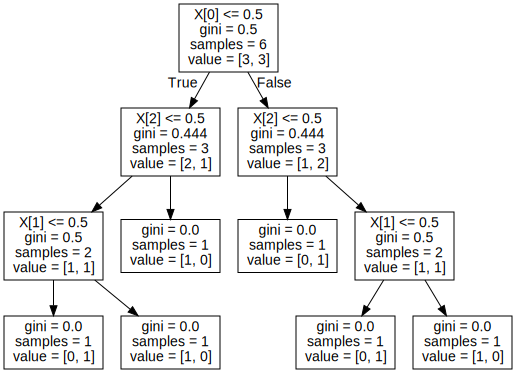

In [9]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print(len(iris.data))

150


# Declare the type of prediction model and the working criteria for the model induction algorithm

In [11]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [12]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
print(indices)

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]
print(indices_training)
print(indices_test)

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28
  55  75  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49
 136  99  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36
  21   9 103  67 117  47]
[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139 

# Fit the learning model on training set

In [43]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [44]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [45]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [46]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

# Obtain model performance results

In [47]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [49]:
np.mean(scores)

0.9400000000000001

In [50]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [24]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [25]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


In [26]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

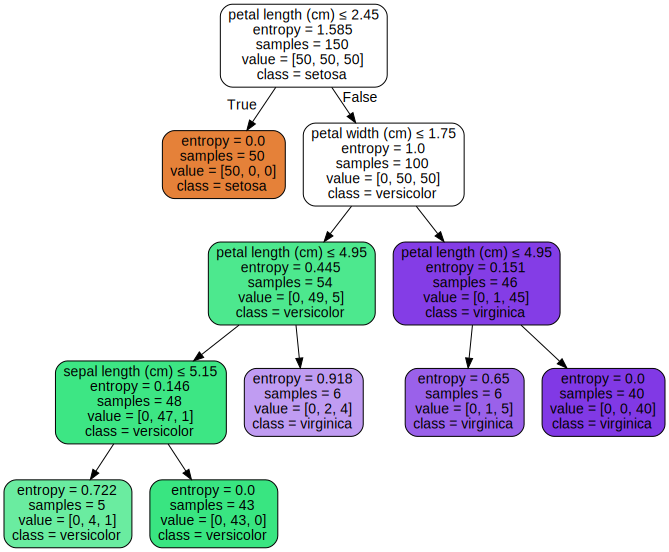

In [27]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#help(tree._tree.Tree)

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica or versicolor which are more difficult to discriminate). Learn the tree in these conditions.
1.b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor or vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
2. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf (min_samples_leaf), max depth of the tree, min_impurity_decrease parameters (min_impurity_decrease), max leaf nodes (max_leaf_nodes), etc.
3. build the confusion matrix of the created tree models on the test set and show them. 
4. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

Tuning params: 


### **(Punti 1 e 2)**
### **Dobbiamo provare a pesare di più Virginica o Versicolor le quali sono più difficili da discriminare (perchè Setosa abbiamo visto che è ben predetta) e capire se le performance cambiano.**

### **Nei Decision Tree c'è un parametro che si chiama: "class_weight" che di dafault è "none" quindi tutte le classi all'inizio hanno lo stesso peso.**

### **Quindi noi andiamo, tramite questo parametro, a pesare di più Virginica o Versicolor quindi ogni errore in Virginica/Versicolor peserà in questo caso 10 volte di più rispetto a prima**

#**{0:1 (setosa), 1:1 (versicolor), 2:10 (virginica)})**

In [55]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1, 1:1, 2:10}) #label:weight

In [56]:
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
np.mean(scores)

[0.93333333 0.93333333 0.86666667 0.83333333 0.93333333]


0.9

La media ora è peggiorata, prima avevamo: [0.96666667 1.         0.86666667 0.86666667 1.        ]

Diciamo che qua abbiamo commesso 4+5+1=10 errori, ma sono rapportati a 600 esempi perchè abbiamo aumentato di 10 volte gli esempi di Virginica

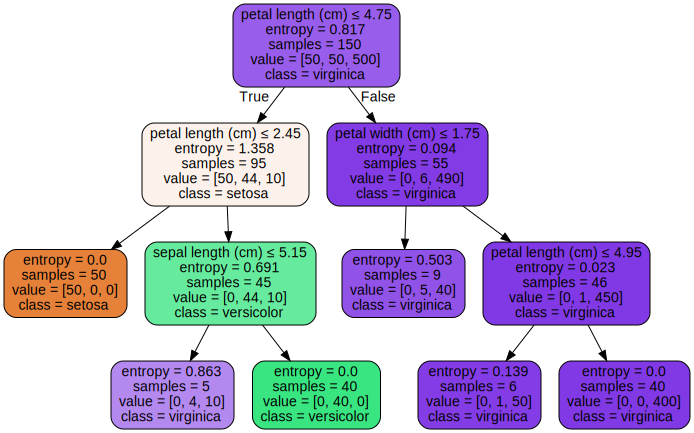

In [57]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#help(tree._tree.Tree)

Proviamo a pesare l'altra classe ovvero Versicolor

In [29]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1, 1:10, 2:1}) #label:weight

In [30]:
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
np.mean(scores)

[0.93333333 0.9        0.9        0.93333333 0.93333333]


0.9200000000000002

Anche stavolta è peggiorata rispetto alla prima classificazione prima dove avevamo: [0.96666667 1.         0.86666667 0.86666667 1.        ]

Diciamo che qua abbiamo commesso 1+4+5=10 errori, ma sono rapportati a 600 esempi perchè abbiamo aumentato di 10 volte gli esempi di Versicolor.

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#help(tree._tree.Tree)

In ogni caso abbiamo notato che non porta benefici aumentare il peso di Virginica/Versicolor

#**(Punto 3) Ora proviamo a migliorare le performance ottenute, facendo tuning degli iperparametri, cioè il numero minimo di esempi per foglia, la profondità massima dell'albero,ecc..**

Importiamo _validation_curve_, poniamo _class_weight_ a balanced (quindi diamo lo stesso peso ad ogni classe.

Al **validation_curve** diamo: il nostro modello, i dati, il target, poi il _param_name_ (cioè il parametro che vogliamo ottimizzare) in questo caso partiamo con _max_depth_ impostando come profondità minima 2 e massima 11 (_param_range_)

In [58]:
from sklearn.model_selection import validation_curve

In [59]:
cfl = tree.DecisionTreeClassifier(class_weight="balanced")
range_min=2
range_max=11

train_scores, test_scores = validation_curve(clf, iris.data, iris.target, param_name="max_depth", param_range=np.arange(range_min,range_max, 1), cv=5, scoring="accuracy") # max_depth
#train_scores, test_scores = validation_curve(clf, iris.data, iris.target, param_name="min_samples_leaf", param_range=np.arange(2,11, 1), cv=5, scoring="accuracy") # min_samples_leaf
#train_scores, test_scores = validation_curve(clf, iris.data, iris.target, param_name="min_impurity_decrease", param_range=np.arange(0.01,3, 1), cv=5, scoring="accuracy") # min_impurity_decrease
#train_scores, test_scores = validation_curve(clf, iris.data, iris.target, param_name="max_leaf_nodes", param_range=np.arange(1,7, 1), cv=5, scoring="accuracy") #max_leaf_nodes

In [60]:
tr_means = np.mean(train_scores, axis=1)
ts_means = np.mean(test_scores, axis=1)

tr_means, ts_means

(array([0.92833333, 0.94      , 0.935     , 0.935     , 0.935     ,
        0.935     , 0.935     , 0.935     , 0.935     ]),
 array([0.89333333, 0.91333333, 0.9       , 0.9       , 0.9       ,
        0.9       , 0.9       , 0.9       , 0.9       ]))

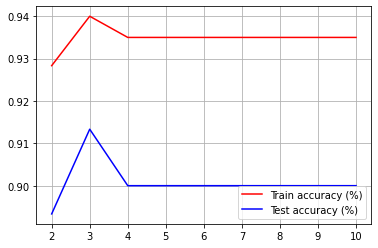

In [61]:
import matplotlib.pyplot as plt

plt.plot(np.arange(range_min,range_max, 1), tr_means, color="red", label="Train accuracy (%)")
plt.plot(np.arange(range_min,range_max, 1), ts_means, color="blue", label="Test accuracy (%)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Per **_max_depth_** (e range 2-11) osserviamo che la situazione con spilt migliore ce l'abbiamo quando abbiamo profondità = 3 e le performance di traning e test set sono molto simili mentre da profondità > 3 c'è una distanza significativa tra traning e test set in quanto peggiora parecchio

Per **_min_samples_leaf_** cioè il minimo numero di esempi richiesti per essere considerati una foglia abbiamo una situazione dove da circa 8 esempi per foglia le performance convergono

Per **_min_impurity_decrease_** abbiamo una situazione molto simile per traning e test set dove vediamo dal grafico che ad impurità sempre più elevata corrisponde un calo sempre più drastico di performance

Per **_max_leaf_nodes_** vediamo dal grafico che dal raggiungimento di 3 fogle in poi sia il traning che il test set convergeranno verso uno score di 0.94/0.96 circa ed ovviamente più le foglie aumentano più rischiamo di andare a fare overfitting

#**(4) Ora proviamo a creare la matrice di confusione..**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

In [ ]:
cfl = tree.DecisionTreeClassifier(class_weight="balanced", max_depth=2)
clf.fit(iris_X_train, iris_y_train)
y_pred = clf.predict(iris_X_test)
cm = confusion_matrix(y_pred, iris_y_test)

In [ ]:
import seaborn as sns

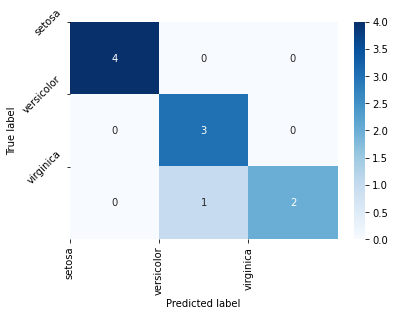

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.xticks(np.arange(3), iris.target_names, rotation=90)
plt.yticks(np.arange(3), iris.target_names, rotation=45)
plt.show()


Notiamo dalla matrice che la classe **Setosa** è correttamente classificata (come abbiamo notato fin'ora) mentre notiamo che su **Virginica** abbiamo un problema cioè 1 esempio di **Virginica** classificato come **Versicolor** 

#**(5) Noi dobbiamo prendere i True Positive e i False Positive e calcolare la curva ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [ ]:
def roc_plot(num_classes, y_pred, y_true):
  fpr = {}
  tpr = {}
  roc = {}

  for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc[i] = auc(fpr[i], tpr[i])
  
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(num_classes):
    mean_tpr+=interp(all_fpr, fpr[i], tpr[i])
  mean_tpr/=num_classes

  fpr["mean"] = all_fpr
  tpr["mean"] = mean_tpr
  roc["mean"] = auc(fpr["mean"], tpr["mean"])

  plt.plot(fpr["mean"], tpr["mean"], label="ROC curve (area = {:0.2f})".format(roc["mean"]), color="blue", linestyle=":")

  colors = cycle(["red", "aqua", "yellow"])
  for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label="ROC curve for {0} (area = {1:0.2f})".format(iris.target_names[i], roc[i]))

  plt.xlabel("fpr")
  plt.ylabel("tpr")
  plt.legend(loc="best")
  plt.plot([0,1], [0,1], 'k--')
  plt.show()



In [ ]:
prob = clf.predict_proba(iris_X_test)
actual_prob = np.zeros((iris_y_test.size, 3))
for i,y in np.ndenumerate(iris_y_test):
  actual_prob[i,y]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]


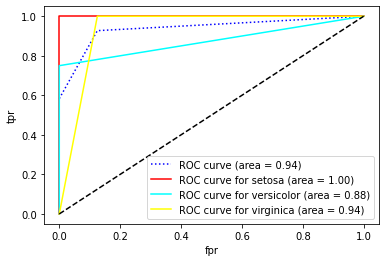

In [ ]:
roc_plot(3, prob, actual_prob)

Notiamo, come abbiamo visto fin'ora che:

La classe **_Setosa_** (rossa) è ben classificata (infatti l'area sotto la curva è 1).

La classe **_Versicolor_** (azzurra) è la peggiore, in quanto ha un area sotto la curva inferiore rispetto alle altre (0.88)

La classe **_Virginica_** (gialla) è leggermente migliore di Versicolor con un'area sotto la curva di 0.94


La media ci indica che il classificatoree tutto sommato è buono (0.94) perchè sbaglia 6 esempi su 100 in media